In [34]:
import pandas as pd

import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

from scipy.spatial.distance import squareform, pdist

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

In [45]:
df = pd.read_csv("data/data.txt")
df = df.drop(columns='Unnamed: 0')
df

,iso_code,location,continent,date,new_cases_per_million,new_cases_smoothed_per_million,stringency_index,positive_rate,human_development_index,cost_living_index,tourist_service_index,international_travel_controls
0,ALB,Albania,Europe,2020-02-25,NaN,NaN,8.33,NaN,0.795,35.50,4.01,1.0
1,ALB,Albania,Europe,2020-02-26,NaN,NaN,8.33,NaN,0.795,35.50,4.01,1.0
2,ALB,Albania,Europe,2020-02-27,NaN,NaN,8.33,NaN,0.795,35.50,4.01,1.0
3,ALB,Albania,Europe,2020-02-28,NaN,NaN,8.33,NaN,0.795,35.50,4.01,1.0
4,ALB,Albania,Europe,2020-02-29,NaN,NaN,8.33,NaN,0.795,35.50,4.01,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
88602,ZWE,Zimbabwe,Africa,2022-03-22,0.000,16.811,NaN,0.0841,0.571,45.68,2.95,NaN
88603,ZWE,Zimbabwe,Africa,2022-03-23,18.089,12.381,NaN,0.0648,0.571,45.68,2.95,NaN
88604,ZWE,Zimbabwe,Africa,2022-03-24,15.637,14.615,NaN,0.0802,0.571,45.68,2.95,NaN
88605,ZWE,Zimbabwe,Africa,2022-03-25,29.883,15.457,NaN,NaN,0.571,45.68,2.95,NaN


In [51]:
medians = df.groupby(["location"]).median()
medians

,new_cases_per_million,new_cases_smoothed_per_million,stringency_index,positive_rate,human_development_index,cost_living_index,tourist_service_index,international_travel_controls
location,,,,,,,,
Albania,58.3030,86.7700,56.48,0.1670,0.795,35.50,4.01,2.0
Algeria,5.1100,5.2990,69.44,NaN,0.748,26.87,1.84,4.0
Argentina,153.4455,151.1790,77.31,0.1830,0.845,34.69,4.53,3.0
Armenia,109.6650,119.0265,NaN,0.1185,0.776,33.89,4.33,NaN
Australia,1.2800,1.0750,65.28,0.0009,0.944,77.75,6.06,4.0
...,...,...,...,...,...,...,...,...
Venezuela,19.0560,23.0870,84.26,NaN,0.711,43.20,2.96,4.0
Vietnam,0.1220,0.1130,67.13,0.0719,0.704,37.48,2.85,4.0
Yemen,0.1970,0.2340,27.78,NaN,0.470,53.14,1.87,3.0


In [52]:
medians = medians.fillna(df.median())
medians = medians.drop(columns = ["international_travel_controls"])
medians = medians.drop(columns = ["new_cases_per_million", "human_development_index"])
tourist = medians.drop(columns = ["positive_rate", "cost_living_index", "stringency_index"])

In [53]:
tourist

,new_cases_smoothed_per_million,tourist_service_index
location,,
Albania,86.7700,4.01
Algeria,5.2990,1.84
Argentina,151.1790,4.53
Armenia,119.0265,4.33
Australia,1.0750,6.06
...,...,...
Venezuela,23.0870,2.96
Vietnam,0.1130,2.85
Yemen,0.2340,1.87


In [54]:
iso_code = tourist.index
scaler = MinMaxScaler()
tourist_scaled = scaler.fit_transform(tourist)
tourist_scaled = pd.DataFrame(tourist_scaled, 
                              columns = ["new_cases_smoothed_per_million", "tourist_service_index"], 
                              index = iso_code)
tourist_scaled

,new_cases_smoothed_per_million,tourist_service_index
location,,
Albania,0.227473,0.458753
Algeria,0.013892,0.022133
Argentina,0.396325,0.563380
Armenia,0.312035,0.523139
Australia,0.002818,0.871227
...,...,...
Venezuela,0.060524,0.247485
Vietnam,0.000296,0.225352
Yemen,0.000613,0.028169


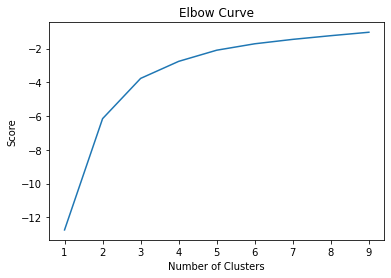

In [55]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(tourist_scaled).score(tourist_scaled) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()
#elbow at 2,3,4,5?

In [56]:
print(np.mean(tourist_scaled["new_cases_smoothed_per_million"]))
print(np.mean(tourist_scaled["tourist_service_index"]))

0.2278300392655722
0.5257579962533823


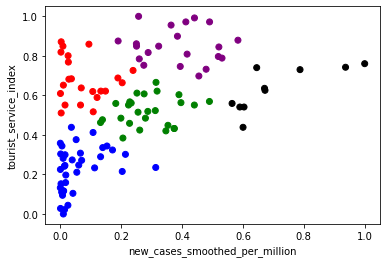

In [66]:
model = KMeans(n_clusters = 5)
model.fit(tourist_scaled)
model.labels_
colormap = np.array(['Red', 'Blue', 'Green', "Purple", "Black"])

z = plt.scatter(tourist_scaled.new_cases_smoothed_per_million, tourist_scaled.tourist_service_index, c = colormap[model.labels_])
plt.xlabel("new_cases_smoothed_per_million")
plt.ylabel("tourist_service_index")
plt.show()

In [67]:
data_with_clusters = tourist_scaled.copy()
data_with_clusters['Clusters'] = model.labels_

In [76]:
data_with_clusters[data_with_clusters['Clusters'] == 0]

,new_cases_smoothed_per_million,tourist_service_index,Clusters
location,,,
Australia,0.002818,0.871227,0
Barbados,0.066386,0.551308,0
Dominican Republic,0.133034,0.621730,0
Finland,0.120689,0.589537,0
Hong Kong,0.002776,0.511066,0
Iceland,0.093934,0.859155,0
Jamaica,0.068769,0.637827,0
Japan,0.025569,0.800805,0
Mauritius,0.009999,0.651911,0


In [77]:
al = medians
al

,new_cases_smoothed_per_million,stringency_index,positive_rate,cost_living_index,tourist_service_index
location,,,,,
Albania,86.7700,56.48,0.1670,35.50,4.01
Algeria,5.2990,69.44,0.0590,26.87,1.84
Argentina,151.1790,77.31,0.1830,34.69,4.53
Armenia,119.0265,57.41,0.1185,33.89,4.33
Australia,1.0750,65.28,0.0009,77.75,6.06
...,...,...,...,...,...
Venezuela,23.0870,84.26,0.0590,43.20,2.96
Vietnam,0.1130,67.13,0.0719,37.48,2.85
Yemen,0.2340,27.78,0.0590,53.14,1.87


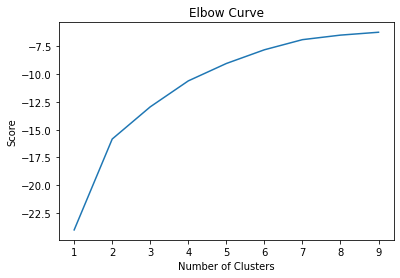

In [79]:
iso_code = al.index
scaler = MinMaxScaler()
al_scaled = scaler.fit_transform(al)
al_scaled = pd.DataFrame(al_scaled, 
                              columns = ["new_cases_smoothed_per_million", "stringency_index", 
                                         "positive_rate","cost_living_index", "tourist_service_index"], 
                              index = iso_code)
al_scaled

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(al_scaled).score(al_scaled) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [80]:
model = KMeans(n_clusters = 7)
model.fit(al_scaled)
model.labels_
#colormap = np.array(['Red', 'Blue', 'Green', "Purple", "Black"])

#z = plt.scatter(al.new_cases_smoothed_per_million, tourist_scaled.tourist_service_index, c = colormap[model.labels_])
#plt.xlabel("new_cases_smoothed_per_million")
#plt.ylabel("tourist_service_index")
#plt.show()


array([4, 5, 4, 3, 1, 6, 5, 2, 5, 1, 6, 4, 3, 3, 6, 5, 0, 6, 3, 5, 4, 4,
       6, 6, 1, 4, 4, 4, 0, 2, 0, 1, 6, 2, 6, 0, 6, 4, 5, 1, 3, 1, 5, 5,
       5, 6, 6, 6, 3, 1, 3, 5, 5, 3, 2, 3, 2, 6, 3, 6, 1, 4, 4, 5, 2, 5,
       3, 5, 2, 1, 0, 5, 3, 1, 3, 5, 3, 4, 3, 5, 3, 6, 3, 3, 3, 5, 1, 0,
       2, 2, 1, 2, 2, 3, 1, 6, 5, 4, 1, 6, 1, 0, 1, 4, 3, 5, 4, 6, 6, 6,
       3, 5, 5, 0, 0, 5], dtype=int32)

In [87]:
data_with_clusters = al_scaled.copy()
data_with_clusters['Clusters'] = model.labels_
data_with_clusters[data_with_clusters['Clusters'] == 6]

,new_cases_smoothed_per_million,stringency_index,positive_rate,cost_living_index,tourist_service_index,Clusters
location,,,,,,
Austria,0.440768,0.682997,0.023768,0.494247,0.991952,6
Belgium,0.455179,0.561043,0.188406,0.509427,0.698189,6
Bulgaria,0.323157,0.524430,0.210580,0.178478,0.849095,6
Canada,0.189920,0.823127,0.108406,0.486319,0.875252,6
Croatia,0.363896,0.426841,0.335362,0.280576,0.955734,6
Cyprus,0.531249,0.548795,0.020290,0.378130,0.788732,6
France,0.519156,0.768339,0.150725,0.524123,0.796781,6
Germany,0.250423,0.780456,0.215942,0.441458,0.849095,6
Greece,0.416553,0.853615,0.084638,0.350962,0.808853,6
